### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
print(reviews.isnull().sum())

# No missing values were found

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Shape of the dataframe
reviews.shape

(2000, 11)

In [6]:
# Descriptive statistics.
reviews.describe

<bound method NDFrame.describe of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     

## 2. Drop columns

In [7]:
# Drop unnecessary language and platform columns.

reviews_new = reviews.drop(['language', 'platform'],
                       axis=1)
# View column names.

reviews_new.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the reumeration and spending score column headers.
reviews_new = reviews_new.rename(columns={'remuneration (k£)': 'customer_income', 
                                          'spending_score (1-100)': 'customer_spending_score'})

# View column names.

reviews_new.columns

Index(['gender', 'age', 'customer_income', 'customer_spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews_new.to_csv('reviews_new.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews_new.csv')

# View DataFrame.
reviews

,gender,age,customer_income,customer_spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        17:01:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

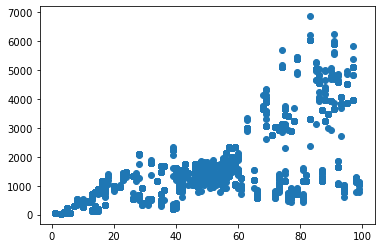

In [11]:
# Independent variable is set as spending score.
X = reviews_new["customer_spending_score"]

# Dependent variable is set as loyalty points.
y = reviews_new["loyalty_points"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = reviews_new).fit()

# Prints the regression table
test.summary()

In [12]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.0617 * X - 75.0527

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: customer_spending_score, Length: 2000, dtype: float64

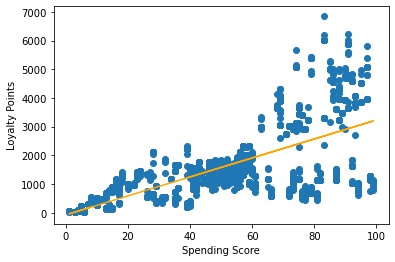

In [14]:
# Plot the graph with a regression line.

plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='orange')
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")
plt.savefig('SpendingVSLoyalty.png')

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        17:01:46   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

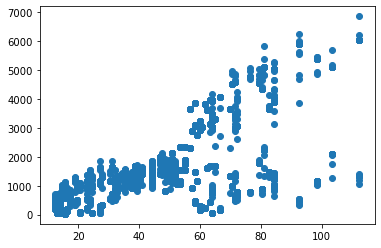

In [15]:
# Independent variable is set as customer income.
X = reviews_new["customer_income"]

# Dependent variable is set as loyalty points.
y = reviews_new["loyalty_points"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = reviews_new).fit()

# Prints the regression table
test.summary()

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 


Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [17]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 34.1878 * X - 65.6865

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: customer_income, Length: 2000, dtype: float64

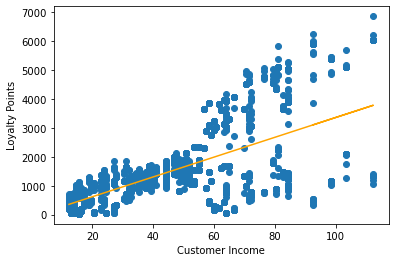

In [18]:
# Plot the graph with a regression line.

plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='orange')
plt.xlabel("Customer Income")
plt.ylabel("Loyalty Points")
plt.savefig('IncomeVSLoyalty.png')
plt.show()

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 08 Sep 2022   Prob (F-statistic):             0.0577
Time:                        17:01:46   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

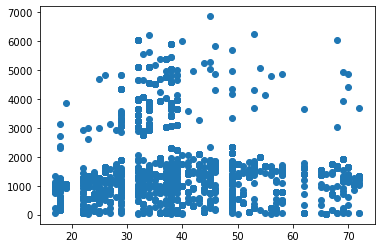

In [19]:
# Independent variable is set as age.
X = reviews_new["age"]

# Dependent variable is set as loyalty points.
y = reviews_new["loyalty_points"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = reviews_new).fit()

# Prints the regression table
test.summary()


In [20]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [21]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.0128 * X + 1736.5177

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

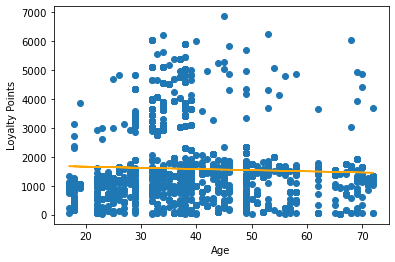

In [22]:
# Plot the graph with a regression line.

plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='orange')
plt.xlabel("Age")
plt.ylabel("Loyalty Points")
plt.savefig('AgeVSLoyalty.png')

## 6. Observations and insights

***Your observations here...***






Customer incomes and spending scores predict a customer’s amount of loyalty points almost identically as seen with the upward sloping line of best fits. Age on the other hand can be discounted as a predictor of loyalty points almost entirely as it has no relationship with loyalty points.

Both iincome and spending generate similar r-squared results with income and spending scores explaining 38% and 45% of the variation in loyalty points. Age only explains 0.2% of the variation. The results for income and spending are stastically significant whereas it is not for age.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [23]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews_new.csv')

# View the DataFrame.
df2

,gender,age,customer_income,customer_spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [25]:
# Drop review and summary columns.

df2 = df2.drop(['review', 'summary'],
                       axis=1)


# View DataFrame.
df2

,gender,age,customer_income,customer_spending_score,loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291
...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977
1996,Female,43,92.66,8,539,PhD,979
1997,Male,34,92.66,91,5614,graduate,1012
1998,Male,34,98.40,16,1048,PhD,1031


In [26]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   2000 non-null   object 
 1   age                      2000 non-null   int64  
 2   customer_income          2000 non-null   float64
 3   customer_spending_score  2000 non-null   int64  
 4   loyalty_points           2000 non-null   int64  
 5   education                2000 non-null   object 
 6   product                  2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


In [27]:
# Descriptive statistics.
df2.describe

<bound method NDFrame.describe of       gender  age  customer_income  customer_spending_score  loyalty_points  \
0       Male   18            12.30                       39             210   
1       Male   23            12.30                       81             524   
2     Female   22            13.12                        6              40   
3     Female   25            13.12                       77             562   
4     Female   33            13.94                       40             366   
...      ...  ...              ...                      ...             ...   
1995  Female   37            84.46                       69            4031   
1996  Female   43            92.66                        8             539   
1997    Male   34            92.66                       91            5614   
1998    Male   34            98.40                       16            1048   
1999    Male   32            92.66                        8             479   

     education  p

## 2. Plot

<AxesSubplot:xlabel='customer_income', ylabel='customer_spending_score'>

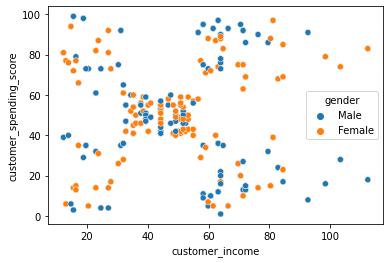

In [28]:
# Create a scatterplot of income and spending scores with Seaborn, set the hue by gender.

sns.scatterplot(x='customer_income', y='customer_spending_score', data=df2, hue='gender')

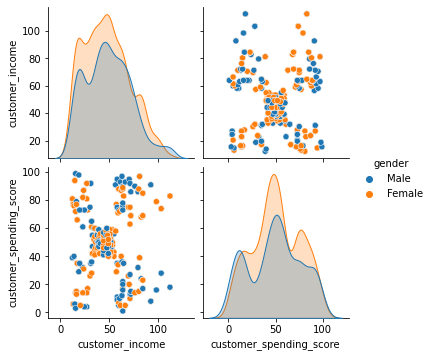

In [29]:
# Create a pairplot with Seaborn, set the hue by gender.

x = df2[['customer_income', 'customer_spending_score']]

sns.pairplot(df2, vars=x,
             diag_kind= 'kde', hue='gender')

## 3. Elbow and silhoutte methods

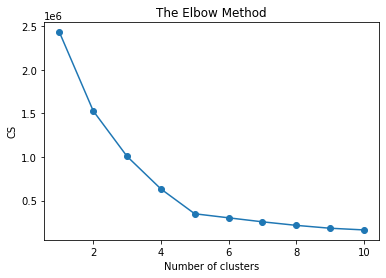

In [30]:
# Determine the number of clusters: Elbow method.

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.savefig('ElbowMethod.png')
plt.show()

# The inflexion point of the graph is at 5 on the line graph.

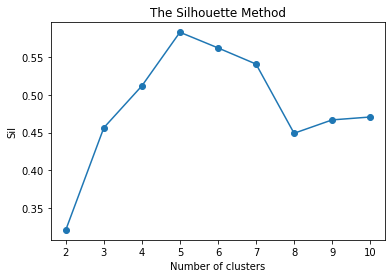

In [31]:
# Determine the number of clusters: Silhouette method.

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.savefig('SilohouetteMethod.png')
plt.show()

# The inflexion point of the graph is at 5 on the line graph.

## 4. Evaluate k-means model at different values of *k*

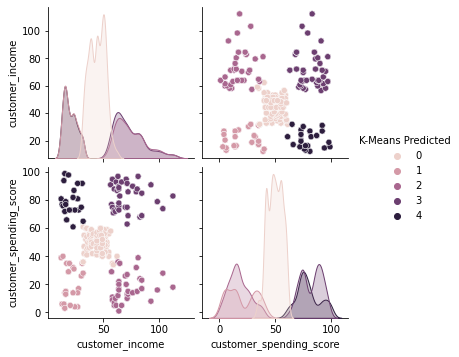

In [32]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the prediction
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')
plt.savefig('ClusterPairplot.png')

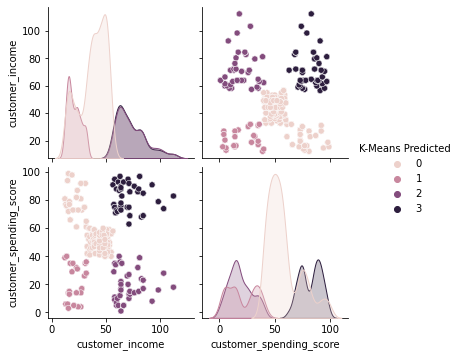

In [33]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the prediction
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

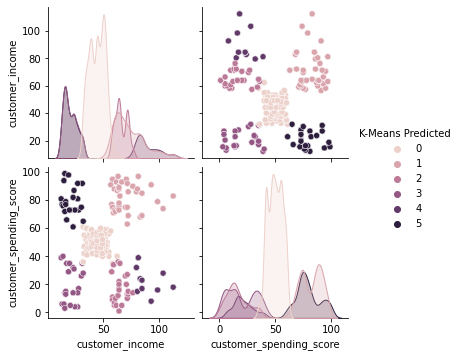

In [34]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the prediction
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [35]:
# After testing various values for K, 5 is deemed as the optimum value.

## 5. Fit final model and justify your choice

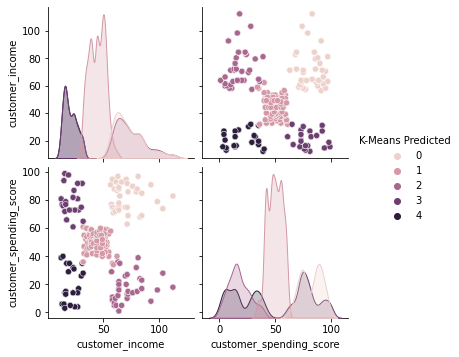

In [36]:
# Apply the final model with 5 clusters.

# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')


In [37]:
# Check the number of observations per predicted class.

x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [38]:
# Visualising the clusters.
print(x.head())

# View the DataFrame.


   customer_income  customer_spending_score  K-Means Predicted
0            12.30                       39                  4
1            12.30                       81                  3
2            13.12                        6                  4
3            13.12                       77                  3
4            13.94                       40                  4


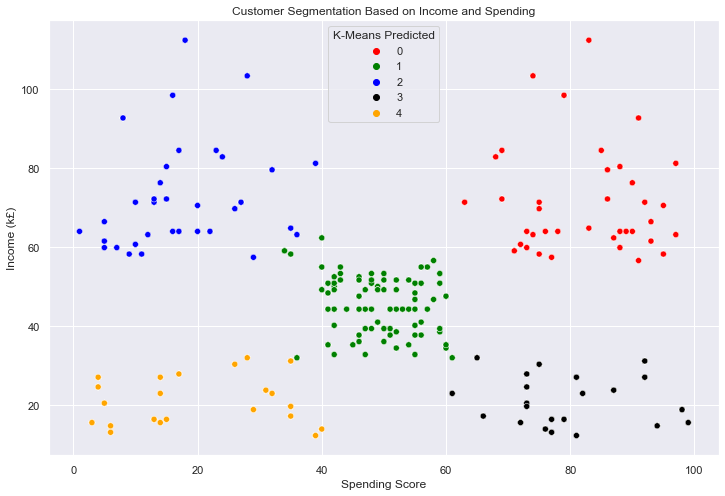

In [39]:
# Visualising the clusters.

sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='customer_spending_score' , 
                y ='customer_income',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

plt.title("Customer Segmentation Based on Income and Spending")
plt.xlabel("Spending Score")
plt.ylabel("Income (k£)")
plt.savefig('KMeans_Cluster.png')

## 7. Discuss: Insights and observations

***Your observations here...***

After applying the Elbow and Silohouette method, 5 clusters statistically is the best choice to segment by income and spending score. The scatter plot is colour coded, with red (high income, high spending), blue (high income, low spending), green (average income, average spending), black (high spending, low income) and yellow (low spending, low income).

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [40]:
# Import all the necessary packages.

import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import re

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

nltk.download ('punkt')
nltk.download ('stopwords')

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jakee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jakee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Load the data set as df3.

df3 = pd.read_csv('reviews_new.csv')

# View DataFrame.

df3.head()

,gender,age,customer_income,customer_spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [42]:
# Explore data set.

print(df3.info())
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   2000 non-null   object 
 1   age                      2000 non-null   int64  
 2   customer_income          2000 non-null   float64
 3   customer_spending_score  2000 non-null   int64  
 4   loyalty_points           2000 non-null   int64  
 5   education                2000 non-null   object 
 6   product                  2000 non-null   int64  
 7   review                   2000 non-null   object 
 8   summary                  2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


(2000, 9)

In [43]:
# Keep necessary columns. Drop unnecessary columns.

df3 = df3[['review', 'summary']]

# View DataFrame.

df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [44]:
# Determine if there are any missing values.

print(df3.isnull().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [45]:
# Review: Change all to lower case and join with a space.

# This loop changes every string to lower case and removes unnecessary spaces.
for i in range(len(df3['review'])):
    df3['review'][i] = df3['review'][i].lower()
    df3['review'][i] = " ".join(df3['review'][i].split())
    
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [46]:
# Summary: Change all to lower case and join with a space.

# This loop changes every string to lower case and removes unnecessary spaces.
for i in range(len(df3['summary'])):
    df3['summary'][i] = df3['summary'][i].lower()
    df3['summary'][i] = " ".join(df3['summary'][i].split())
    
    
df3['summary'].head(5)

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [47]:
# Replace all the punctuations in review column.

# This loop removes the punctuation from each sentence.
for i in range(len(df3['review'])):
    df3['review'][i] = re.sub(r'[^\w\s]','', df3['review'][i])

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [48]:
# Replace all the puncuations in summary column.

# This loop removes the punctuation from each sentence.
for i in range(len(df3['summary'])):
    df3['summary'][i] = re.sub(r'[^\w\s]','', df3['summary'][i])

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [49]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates()

# View DataFrame.
df3.shape

(1961, 2)

## 3. Tokenise and create wordclouds

In [50]:
# Create new DataFrame (copy DataFrame).

df4 = df3

# View DataFrame.

df4.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [51]:
# Apply tokenisation to both columns.

df4['review_tokenized'] = df4['review'].apply(word_tokenize)
df4['summary_tokenized'] = df4['summary'].apply(word_tokenize)
    

df4 = df4.reset_index()

# View DataFrame.

df4.head()

,index,review,summary,review_tokenized,summary_tokenized
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [52]:
# Review: Create a word cloud.

# Set an empty set to add words.
review_words = ''

# Loop adds all words from each sentence into empty set.
for i in range(len(df4['review'])):
    
    review_words = review_words + df4['review'][i]
    

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_words) 


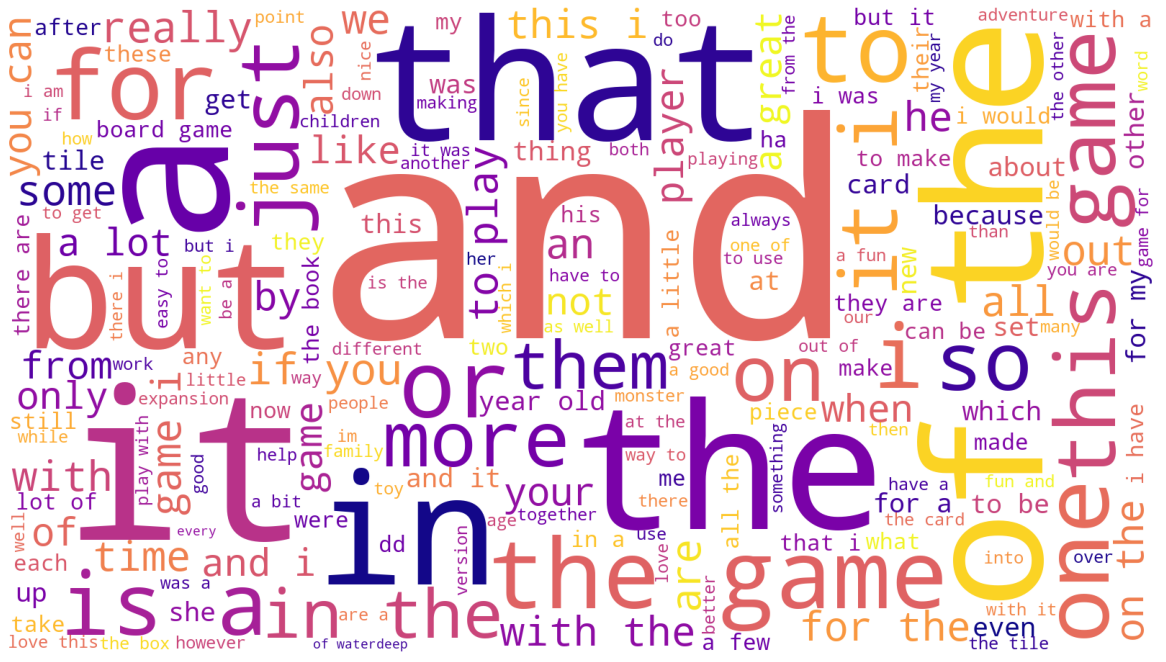

In [53]:
# Review: Plot the WordCloud image.

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [54]:
# Summary: Create a word cloud.

# Set an empty set to add words.
summary_words = ''

# Loop adds all words from each sentence into empty set.
for i in range(len(df4['summary'])):
    
    summary_words = summary_words + df4['summary'][i]
    

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_words)

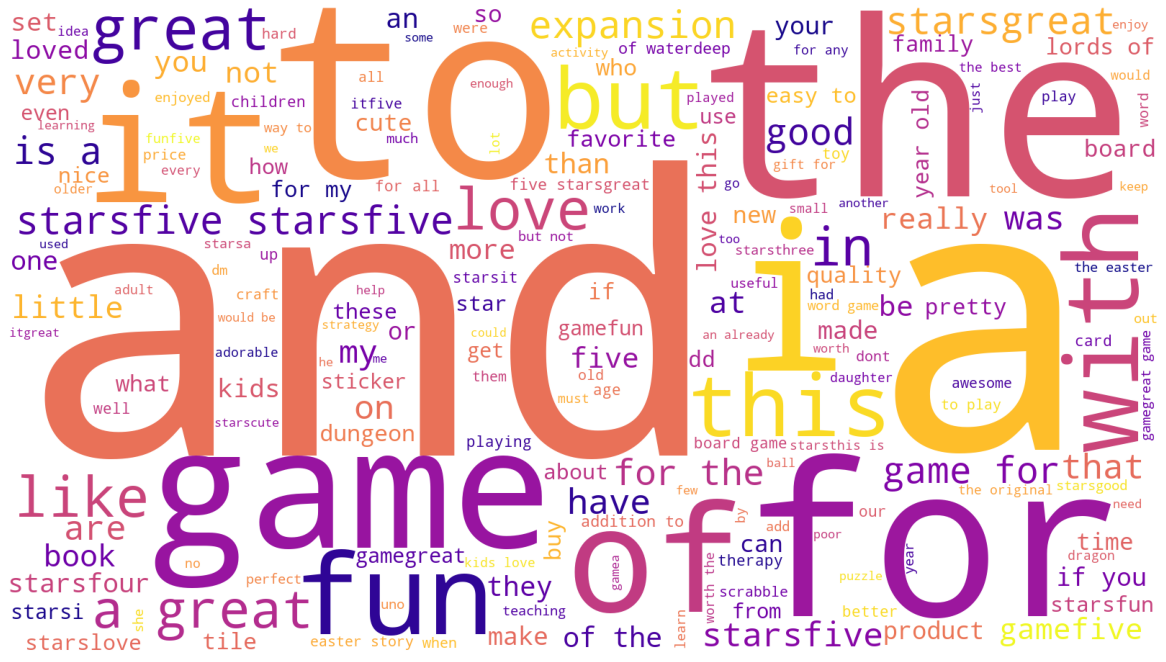

In [55]:
# Summary: Plot the WordCloud image.

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [56]:
# Determine the frequency distribution.

all_review_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + df4['review_tokenized'][i]
    

# Calculate the frequency distribution.
fdist_review = FreqDist(all_review_tokens)

# Preview data.
print(fdist_review)

<FreqDist with 7520 samples and 112124 outcomes>


In [57]:
all_summary_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_summary_tokens = all_summary_tokens + df4['summary_tokenized'][i]
    

# Calculate the frequency distribution.
fdist_summary = FreqDist(all_summary_tokens)

# Preview data.
print(fdist_summary)

<FreqDist with 1550 samples and 9281 outcomes>


### 4b) Remove alphanumeric characters and stopwords

In [58]:
# Delete all the alpanum.

tokens_rev = [word for word in all_review_tokens if word.isalnum()]
tokens_sum = [word for word in all_summary_tokens if word.isalnum()]

tokens_rev_sum = tokens_rev + tokens_sum

In [59]:
# Remove all the stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_rev2 = [x for x in tokens_rev if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_rev_string = ''

for value in tokens_rev2:
    # Add each filtered token word to the string.
    tokens_rev_string = tokens_rev_string + value + ' '

In [60]:
# Remove all the stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_sum2 = [x for x in tokens_sum if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_sum_string = ''

for value in tokens_sum2:
    # Add each filtered token word to the string.
    tokens_sum_string = tokens_sum_string + value + ' '
    
    

In [61]:
# Remove all the stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens = [x for x in tokens_rev_sum if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens_string = tokens_string + value + ' '


### 4c) Create wordcloud without stopwords

In [62]:
# Create a wordcloud without stop words.

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_rev_string) 

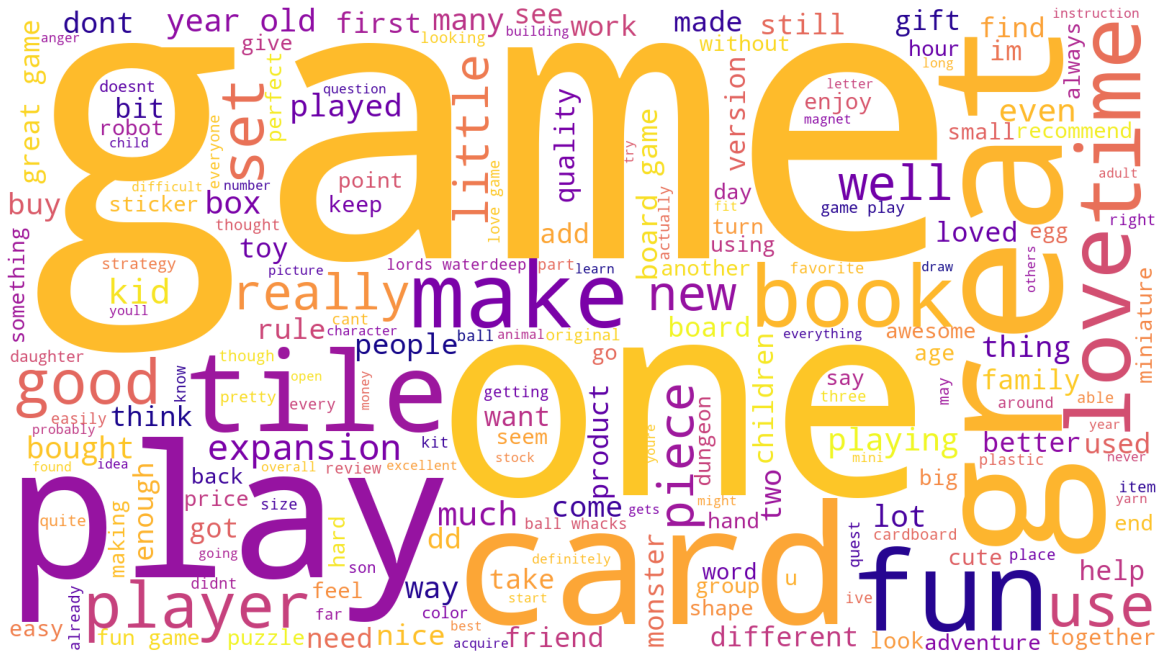

In [63]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [64]:
# Create a wordcloud without stop words.

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_sum_string) 

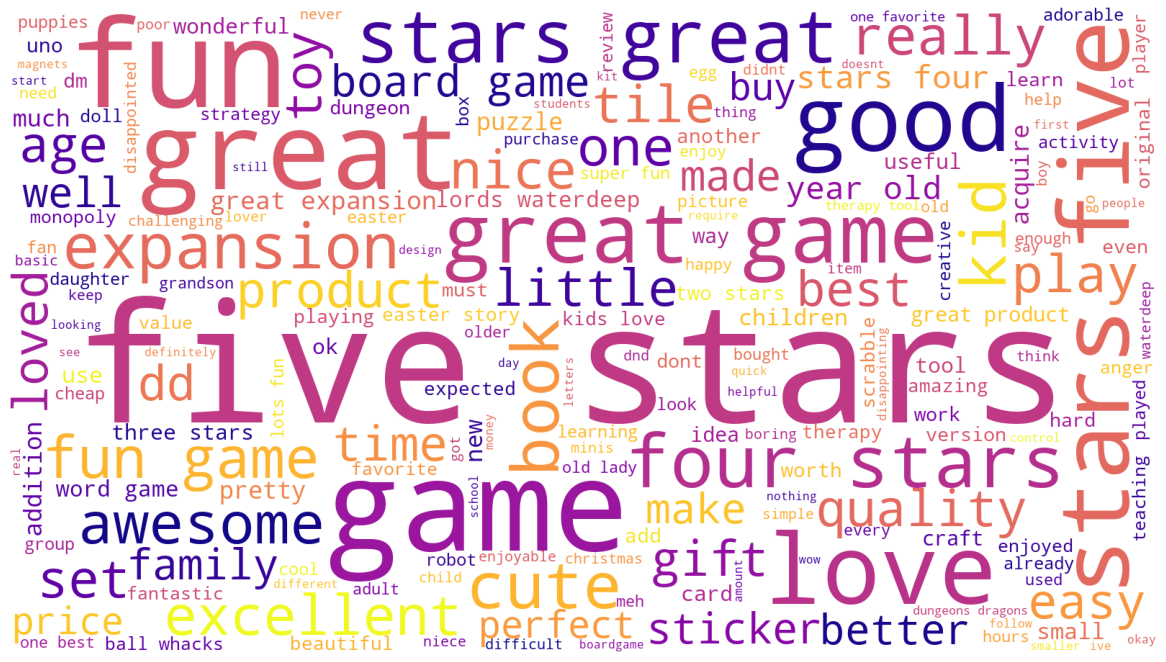

In [65]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [66]:
# Create a wordcloud without stop words.

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_string) 


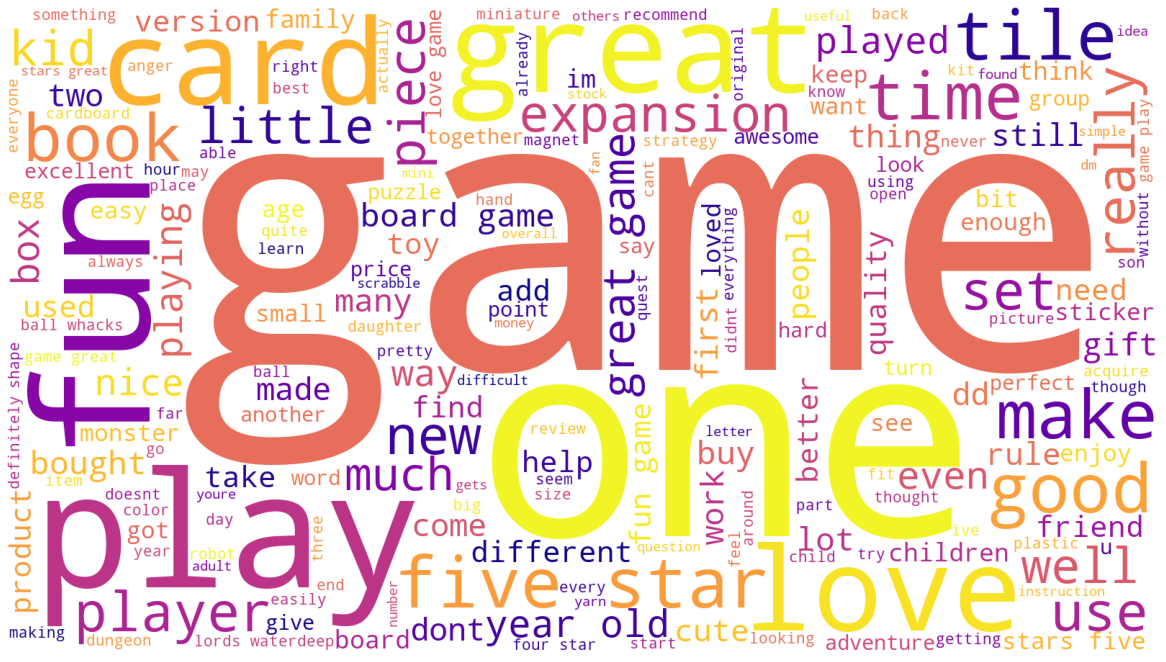

In [67]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [68]:
# Determine the 15 most common words.

# View the frequency distribution.
fdist_rev = FreqDist(tokens_rev2)
print(fdist_rev)


fdist_sum = FreqDist(tokens_sum2)
print(fdist_sum)


fdist = FreqDist(tokens)
print(fdist)

<FreqDist with 7382 samples and 57660 outcomes>
<FreqDist with 1441 samples and 6138 outcomes>
<FreqDist with 7525 samples and 63798 outcomes>


In [69]:
# Creates dataframe of frequency distribution of reviews. Shows the most common 15.

counts_rev = pd.DataFrame(Counter(tokens_rev2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

counts_rev

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


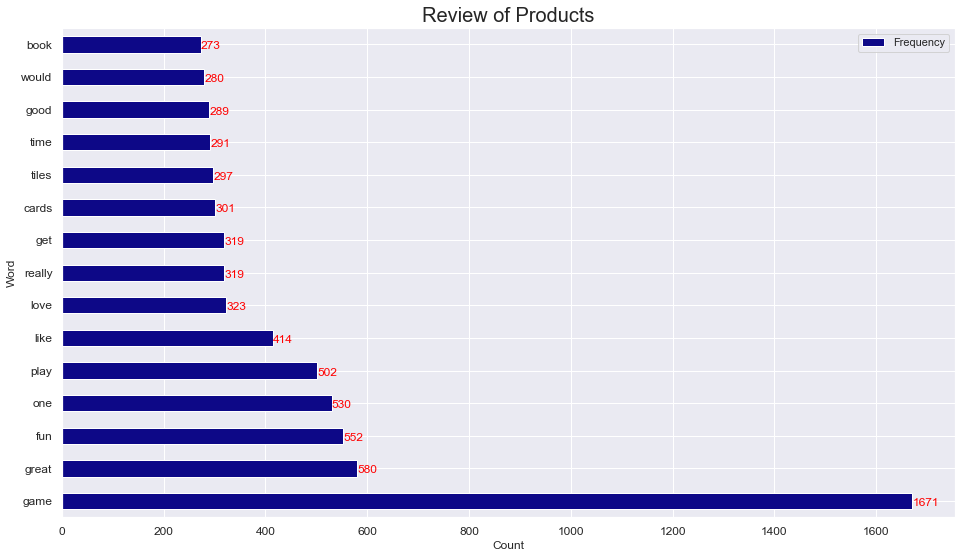

In [70]:
# Plots the frequency distribution of reviews as a bar graph 

ax = counts_rev.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review of Products",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [71]:
# Creates dataframe of frequency distribution of summaries. Shows the most common 15.

counts_sum = pd.DataFrame(Counter(tokens_sum2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

counts_sum

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


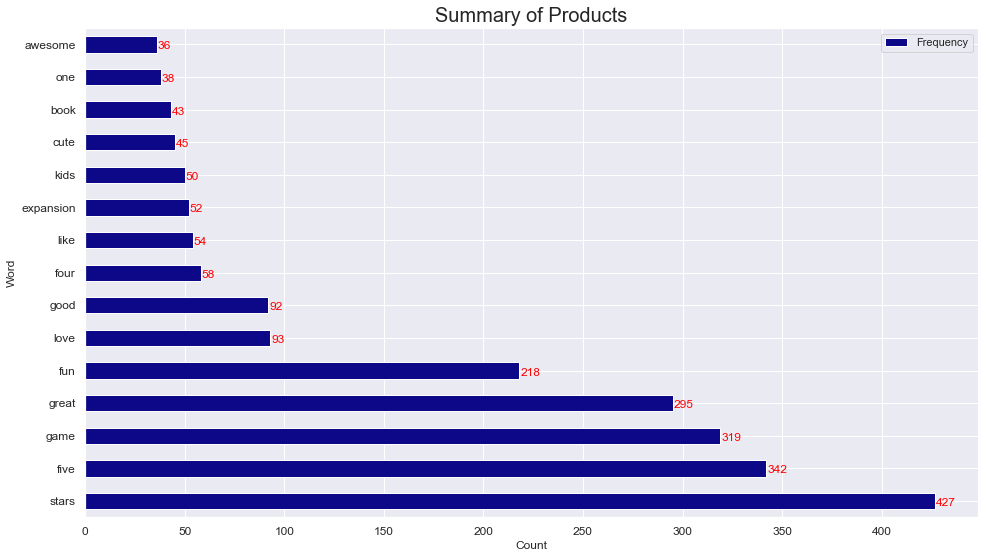

In [72]:
# Plots the frequency distribution of reviews as a bar graph 

ax = counts_sum.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary of Products",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
plt.savefig('Summary_Distribution.png')



In [73]:
# Creates dataframe of frequency distribution of star ratings in reviews. Shows the most common 15.

counts_stars = pd.DataFrame(Counter(tokens_sum2).most_common(),
                      columns=['Word', 'Frequency']).set_index('Word')

counts_stars2 = counts_stars.filter(items=['five', 'four', 'three', 'two','one'], axis=0)

counts_stars2

,Frequency
Word,
five,342
four,58
three,16
two,16
one,38


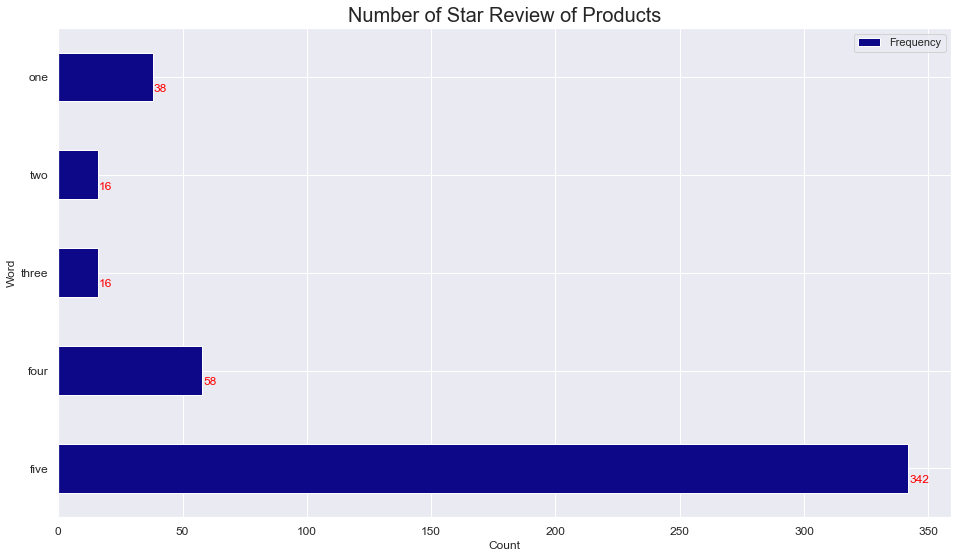

In [74]:
# Plots the frequency distribution of star ratings as a bar graph.

ax = counts_stars2.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Number of Star Review of Products",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

plt.savefig('Star_rating_distribution.png')

In [75]:
# Prints the star ratings as a percentage of total.

stars_sum = counts_stars2['Frequency'].sum()

counts_stars2['Percentage %'] = counts_stars2['Frequency'].apply(lambda x: (x / stars_sum)*100)

counts_stars2['Percentage %'] = round(counts_stars2['Percentage %'])

counts_stars2['Percentage %'] 

Word
five     73.0
four     12.0
three     3.0
two       3.0
one       8.0
Name: Percentage %, dtype: float64

In [76]:
# Average star rating is 4.3

average_star_rating = (5*342 + 58*4 + 16*3 + 16*2 + 38*1) / 470

print(average_star_rating)

4.382978723404255


In [77]:
# Creates dataframe of frequency distribution of reviews and summaries reviews. Shows the most common 15.
counts = pd.DataFrame(Counter(tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

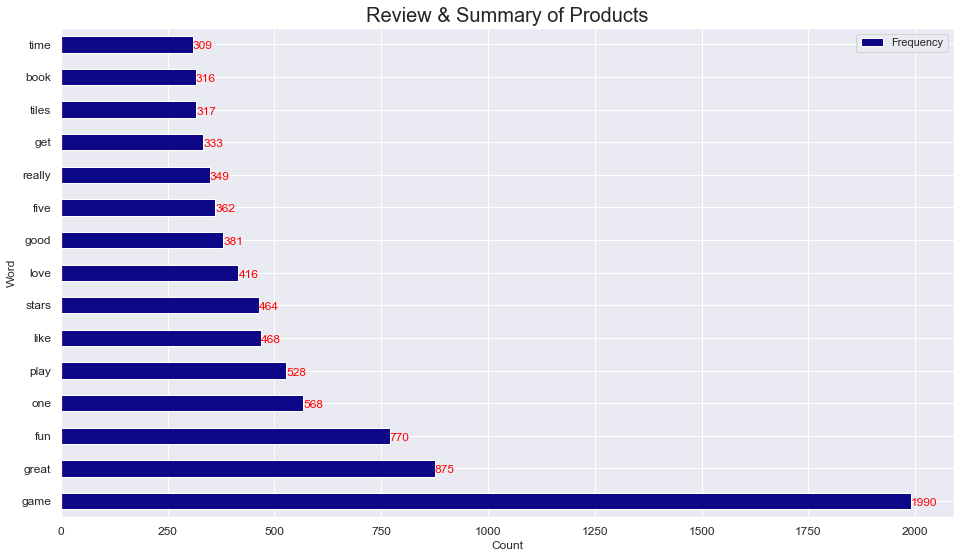

In [78]:
# Plots the frequency distribution of reviews and summaries as a bar graph.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review & Summary of Products",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [79]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [80]:
# Determine polarity of both columns. 
df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# View output.
df4.head()

,index,review,summary,review_tokenized,summary_tokenized,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


In [81]:
print(df4['polarity_review'].describe())
print(df4['polarity_summary'].describe())

count    1961.000000
mean        0.213170
std         0.260360
min        -1.000000
25%         0.045833
50%         0.177222
75%         0.351562
max         1.000000
Name: polarity_review, dtype: float64
count    1961.000000
mean        0.223678
std         0.337507
min        -1.000000
25%         0.000000
50%         0.100000
75%         0.475000
max         1.000000
Name: polarity_summary, dtype: float64


In [82]:
# Loop to count the number of positive, neutral and negative reviews.

Positive = 0
Neutral = 0
Negative = 0

for i in range(0,len(df4)):
    
    if df4['polarity_review'][i] >= 0.5:
        Positive = Positive + 1
        
    elif df4['polarity_review'][i] <= -0.5:
        Negative = Negative + 1
        
    else:
        Neutral = Neutral + 1
        
        
Pos = round(Positive / (Positive + Neutral + Negative) * 100)
Neu = round(Neutral / (Positive + Neutral + Negative) * 100)
Neg = round(Negative / (Positive + Neutral + Negative) * 100)

print(f'{Pos}% have positive sentiments towards the product')
print(f'{Neu}% have neutral sentiments towards the product')
print(f'{Neg}% have negative sentiments towards the product')

15% have positive sentiments towards the product
85% have neutral sentiments towards the product
1% have negative sentiments towards the product


In [83]:
# Loop to count the number of positive, neutral and negative summaries.

Positive = 0
Neutral = 0
Negative = 0

for i in range(0,len(df4)):
    
    if df4['polarity_summary'][i] >= 0.5:
        Positive = Positive + 1
        
    elif df4['polarity_summary'][i] <= -0.5:
        Negative = Negative + 1
        
    else:
        Neutral = Neutral + 1
        
        
Pos = round(Positive / (Positive + Neutral + Negative) * 100)
Neu = round(Neutral / (Positive + Neutral + Negative) * 100)
Neg = round(Negative / (Positive + Neutral + Negative) * 100)

print(f'{Pos}% have positive sentiments towards the product')
print(f'{Neu}% have neutral sentiments towards the product')
print(f'{Neg}% have negative sentiments towards the product')

25% have positive sentiments towards the product
74% have neutral sentiments towards the product
1% have negative sentiments towards the product


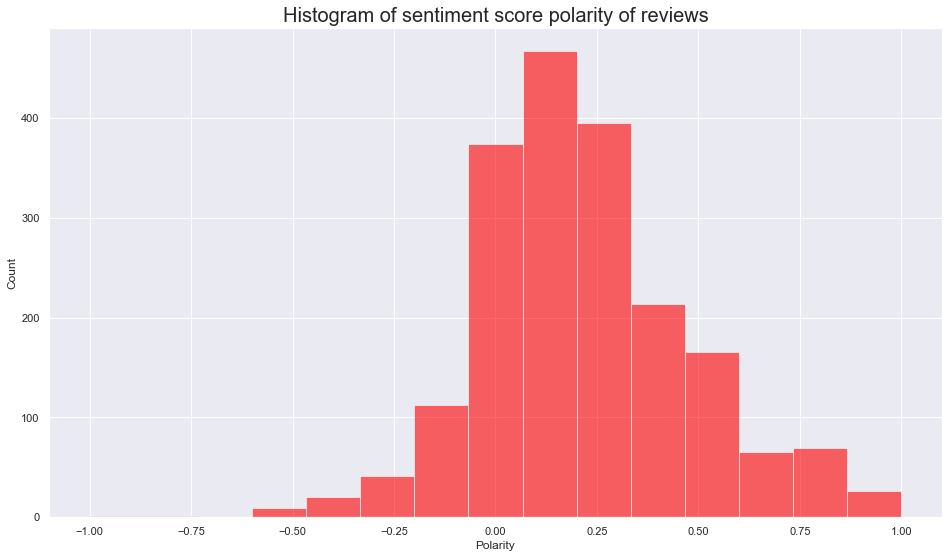

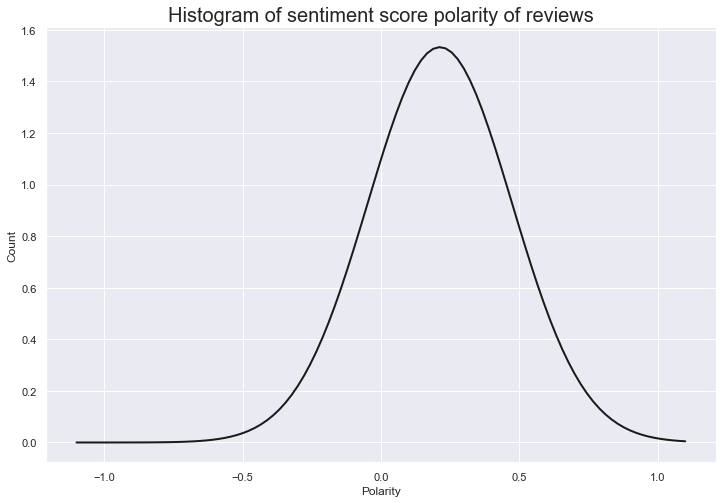

In [84]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.

num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_review']) 
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12, 8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)
plt.show()


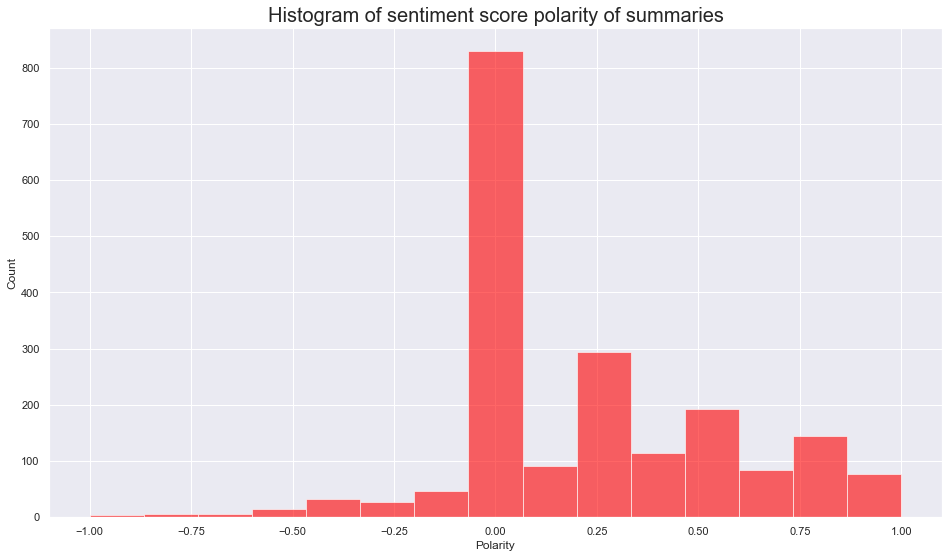

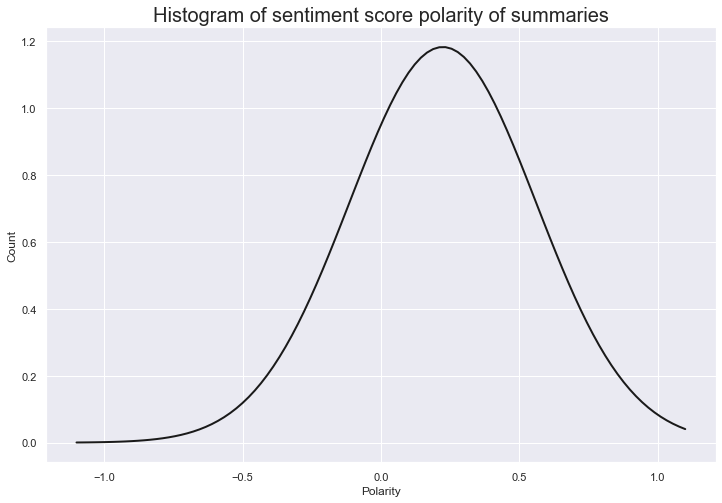

In [85]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of summaries', fontsize=20)
plt.savefig('Polarity_Histogram.png')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_summary']) 
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12, 8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of summaries', fontsize=20)

plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [86]:
# Top 20 negative reviews.
negative_review = df4.nsmallest(20, 'polarity_review')
negative_review = negative_review[['review', 'polarity_review']]

# View output.
negative_review

,review,polarity_review
207,booo unles you are patient know how to measure...,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring...,-0.583333
362,one of my staff will be using this game soon s...,-0.550000
116,i bought this as a christmas gift for my grand...,-0.500000
226,this was a gift for my daughter i found it dif...,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [87]:
# Top 20 negative summaries.
negative_summary = df4.nsmallest(20, 'polarity_summary')
negative_summary = negative_summary[['summary', 'polarity_summary']]

# View output.
negative_summary

,summary,polarity_summary
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming met...,-0.700000


In [88]:
# Top 20 positive reviews.
positive_review = df4.nlargest(20, 'polarity_review')
positive_review = positive_review[['review', 'polarity_review']]

# View output.
positive_review

,review,polarity_review
7,came in perfect condition,1.0
164,awesome book,1.0
193,awesome gift,1.0
489,excellent activity for teaching selfmanagement...,1.0
517,perfect just what i ordered,1.0
583,wonderful product,1.0
601,delightful product,1.0
613,wonderful for my grandson to learn the resurre...,1.0
782,perfect,1.0
923,awesome,1.0


In [89]:
# Top 20 positive summaries.
positive_summary = df4.nlargest(20, 'polarity_summary')
positive_summary = positive_summary[['review', 'polarity_summary']]

# View output.
positive_summary

,review,polarity_summary
6,i have bought many gm screens over the years b...,1.0
28,these are intricate designs for older children...,1.0
32,awesome my 8 year olds favorite xmas gift its ...,1.0
80,my daughter loves these little books theyre th...,1.0
133,this occupied my almost3 year old for nearly a...,1.0
139,i bought 8 of these for my 3 year old daughter...,1.0
160,my 8 year old son loves this drawing book love...,1.0
162,this was a christmas present for a nephew who ...,1.0
186,great product took a little practice and time ...,1.0
209,i was skeptical but my 9 year old has had so m...,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

Review of products top 15 words – game is by far the most popular, with other words included being positive such as ‘great’, ‘good’, ‘love’ & ‘like’.

Review of summaries – Similar words are included such as ‘great’, ‘awesome’, ‘good’, ‘love’, fun’.

Stars is the most common, indicating that people have ranked products by star values, filtering for this, we see five stars accounts for 73% of reviews, confirming the positive sentiment. If the game lacks an official rating, the average star rating found here is 4.3/5, which could be utilised by the marketing team.

Both reviews and summaries have average polarity scores of 0.2, indicating a positive sentiment. As observed by plotting these values by histograms, it’s the large number of neutral values making this closer to 0, where we can visualise, there are far more positive reviews than negative reviews. By determining above a polarity score of 0.5, and below one of -0.5 as positive and negative respectively, reviews and summaries have 15% and 25% with positive sentiments and only 1% as negative. 

Top 20 – negative reviews
Viewing the negatives reviews, the most often phrases surrounding the game that appear are boring, difficult, and disappointing.

Top 20 – positive reviews 
Viewing the top 20 positive reviews, commons phrases include awesome, great purchases for children.


# 